In [1]:
import pandas as pd
import numpy as np

In [2]:
pd_data = pd.read_csv('cancer_data.csv', sep=',')

In [3]:
pd_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [10]:
cancer_data_index = pd_data[['id']].values

In [13]:
cancer_data = pd_data[['diagnosis','radius_mean','texture_mean','smoothness_mean','compactness_mean']]
cancer_data.index = cancer_data_index.reshape(-1)

In [14]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean
842302,M,17.99,10.38,0.11840,0.27760
842517,M,20.57,17.77,0.08474,0.07864
84300903,M,19.69,21.25,0.10960,0.15990
84348301,M,11.42,20.38,0.14250,0.28390
84358402,M,20.29,14.34,0.10030,0.13280


###  Q1 Create a boxplot or violin plot for each variable to visualize the distribution of the values between malignant and benign samples. 

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

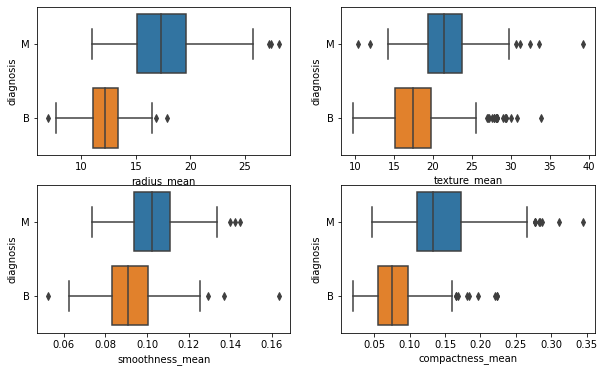

In [16]:
plt.figure(figsize=(10,6))
plt.subplot(221)
sns.boxplot(x='radius_mean',y='diagnosis',data=cancer_data)
plt.subplot(222)
sns.boxplot(x='texture_mean',y='diagnosis',data=cancer_data)
plt.subplot(223)
sns.boxplot(x='smoothness_mean',y='diagnosis',data=cancer_data)
plt.subplot(224)
sns.boxplot(x='compactness_mean',y='diagnosis',data=cancer_data)
plt.show()

the radius_mean will be most accurate in predicting by itself,becase the diagnosis m and B are more differentiated under feature radius_mean。

### Q2 Randomly remove 20% of our data and save it as test_set and the other 80% as training_set. Keep the proportion of Benign and Malignant the same in your test_set and training_set datasets.

In [18]:
X = cancer_data.iloc[:,1:]
Y = cancer_data.iloc[:,0]

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Q3  Using the training_set, create a logistic regression model using the glm() function described in our lecture to create a model for each variable separately. Calculate AUC using the test_set to determine which of the four variables is the most helpful predictor.

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [21]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
y_pred = lr_classifier.predict(x_test)
test_accurcy = accuracy_score(y_test, y_pred)
test_accurcy

0.8947368421052632

In [22]:
# 训练后模型截距 B 
print (lr_classifier.intercept_) 
# 训练后模型权重（特征个数无变化） a1  a2  ...
print (lr_classifier.coef_)

[-19.41118002]
[[0.99933072 0.22490029 0.67868631 2.04647312]]


the compactness_mean is the most helpful predictor.

### Q4 Repeat step 3 but this time with all the variables together and calculate the AUC to compare the results. Does this improve the performance? What conclusions can you draw from the coefficients?

In [24]:
pd_data = pd_data.dropna(axis=1)

In [25]:
pd_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [26]:
X = pd_data.iloc[:,2:]
Y = pd_data.iloc[:,1]

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [28]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)
y_pred = lr_classifier.predict(x_test)
test_accurcy = accuracy_score(y_test, y_pred)
test_accurcy

e:\python36\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.956140350877193

In [29]:
lr_classifier = LogisticRegression(max_iter=10000)
lr_classifier.fit(x_train, y_train)
y_pred = lr_classifier.predict(x_test)
test_accurcy = accuracy_score(y_test, y_pred)
test_accurcy

0.9473684210526315

AUC has indeed been improved, indicating that more features are indeed more conducive to data fitting

### Q5 Perform a decision tree classification using two different values for max_depth parameter. Draw the tree for both and compare AUC for both.

In [30]:
cancer_data.head()

,diagnosis,radius_mean,texture_mean,smoothness_mean,compactness_mean
842302,M,17.99,10.38,0.11840,0.27760
842517,M,20.57,17.77,0.08474,0.07864
84300903,M,19.69,21.25,0.10960,0.15990
84348301,M,11.42,20.38,0.14250,0.28390
84358402,M,20.29,14.34,0.10030,0.13280


In [31]:
# use the radius_mean and compactness_mean
X = cancer_data.iloc[:,[1,4]]
Y = cancer_data.iloc[:,0]

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion="entropy")# 载入决策树分类模型 -分类器选择信息熵
  # criterion =  gini 是指随机选择集合中的元素，基尼系数  ； entropy 是指采用信息增益来选择特征，信息熵
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test) #返回预测的准确度
print(score)

0.868421052631579


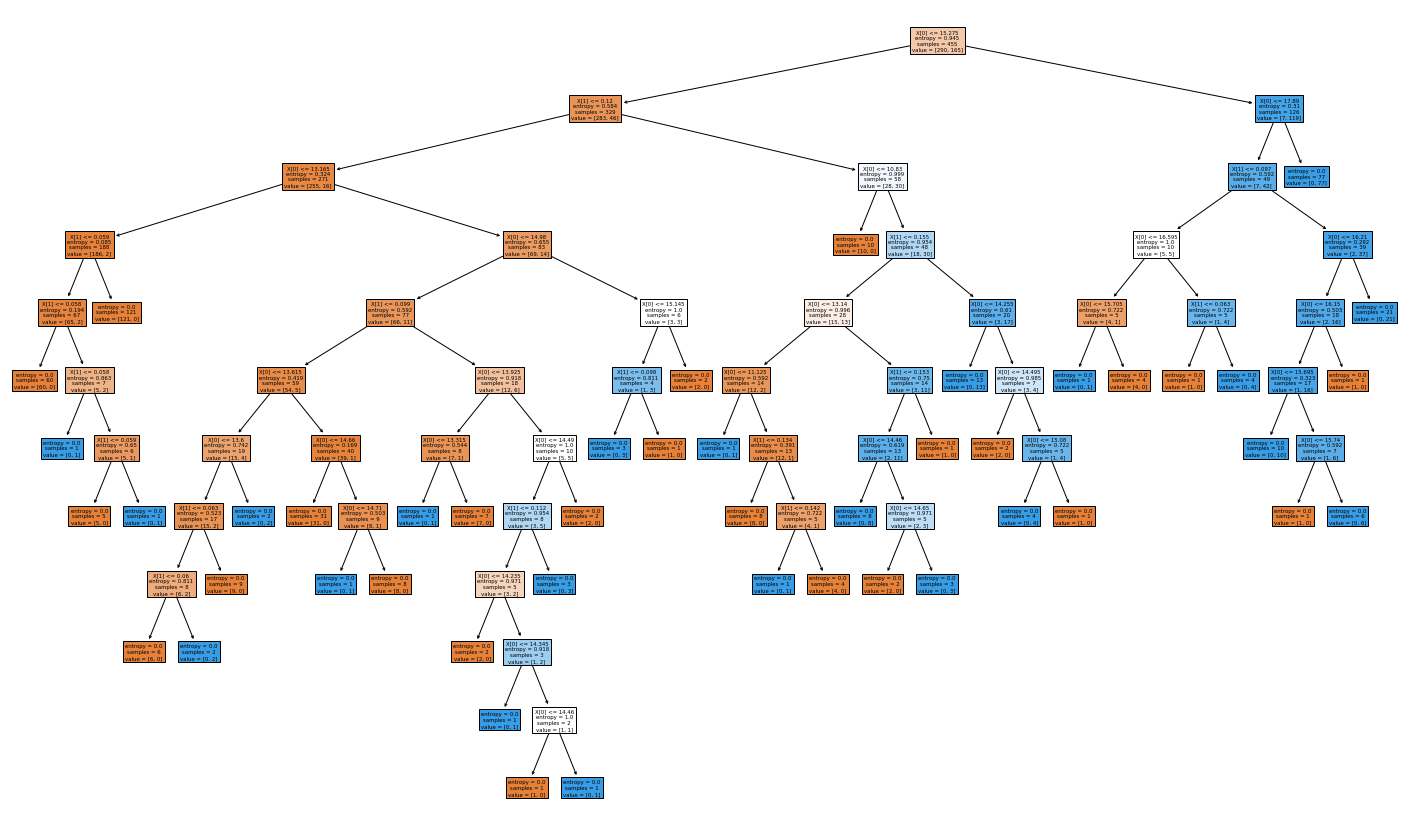

In [34]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25, 15))
plot_tree(clf,filled=True)
plt.show()

In [35]:
# use the texture_mean and smoothness_mean
X = cancer_data.iloc[:,[2,3]]
Y = cancer_data.iloc[:,0]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [36]:
clf = tree.DecisionTreeClassifier(criterion="entropy")# 载入决策树分类模型 -分类器选择信息熵
  # criterion =  gini 是指随机选择集合中的元素，基尼系数  ； entropy 是指采用信息增益来选择特征，信息熵
clf = clf.fit(x_train, y_train)
score = clf.score(x_test, y_test) #返回预测的准确度
print(score)

0.6666666666666666


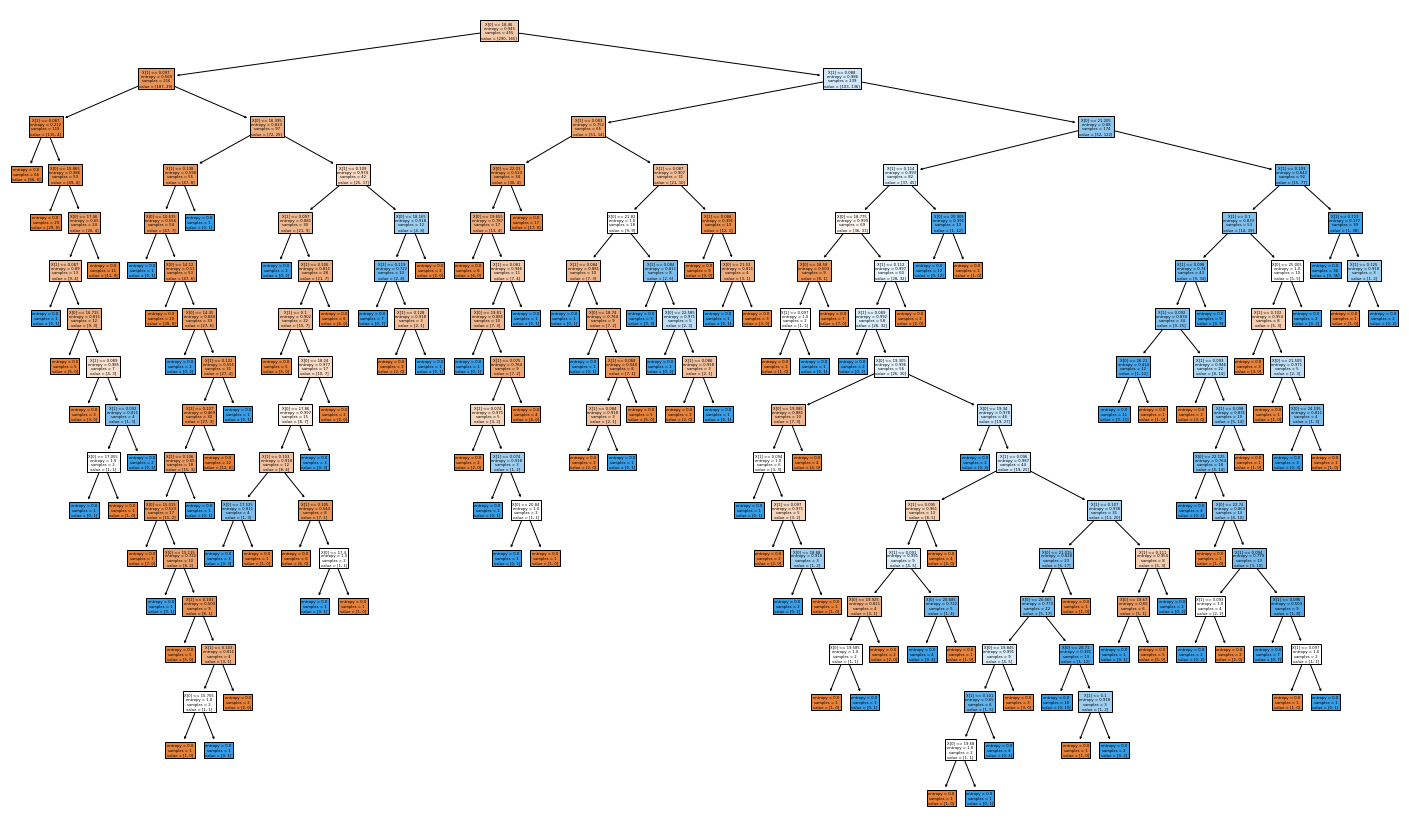

In [37]:
plt.figure(figsize=(25, 15))
plot_tree(clf,filled=True)
plt.show()

From the results, it is obvious that the radius_ mean and compactness_mean have better AUC.
This may be because these two types of features have more segmentation intervals in the data itself, which makes the decision tree model have better segmentation surfaces